### Ejemplo de una funcion cualquiera

In [1]:
import random
import math
import matplotlib.pyplot as plt
#------------------------------------------------------------------------------
# TO CUSTOMIZE THIS PSO CODE TO SOLVE UNCONSTRAINED OPTIMIZATION PROBLEMS, CHANGE THE PARAMETERS IN THIS SECTION ONLY:
# THE FOLLOWING PARAMETERS MUST BE CHANGED.
def objective_function(x):
    y = 3*(1-x[0])**2*math.exp(-x[0]**2 - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*math.exp(-x[0]**2 - x[1]**2) -1/3*math.exp(-(x[0]+1)**2 - x[1]**2);
    return y
 
bounds=[(-3,3),(-3,3)]   # upper and lower bounds of variables
nv = 2                   # number of variables
mm = -1                   # if minimization problem, mm = -1; if maximization problem, mm = 1
 
# THE FOLLOWING PARAMETERS ARE OPTIMAL.
particle_size=100         # number of particles
iterations=200           # max number of iterations
w=0.85                    # inertia constant
c1=1                    # cognative constant
c2=2                     # social constant
# END OF THE CUSTOMIZATION SECTION
#------------------------------------------------------------------------------    
class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position=initial_fitness             # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random initial position
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
 
    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
 
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
 
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i]=bounds[i][0]
 
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
 
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
 
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
 
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if mm ==-1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm ==1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
 
            A.append(fitness_global_best_particle_position) # record the best fitness
 
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.plot(A)
#------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf") # for minimization problem
if mm == 1:
    initial_fitness = -float("inf") # for maximization problem
#------------------------------------------------------------------------------   
# Main PSO         
PSO(objective_function,bounds,particle_size,iterations)

Optimal solution: [0.22827879860395464, -1.625536324458821]
Objective function value: -6.551133332809342
Evolutionary process of the objective function value:


### Modifying the objective function above

Optimal solution: [-3, -3, 0.2307319596641133]
Objective function value: -40.5
Evolutionary process of the objective function value:


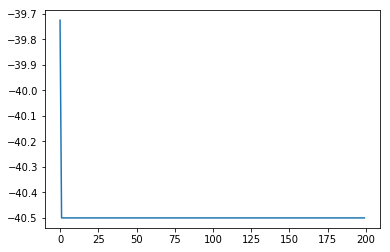

In [2]:
import random
import math
import matplotlib.pyplot as plt
#------------------------------------------------------------------------------
# TO CUSTOMIZE THIS PSO CODE TO SOLVE UNCONSTRAINED OPTIMIZATION PROBLEMS, CHANGE THE PARAMETERS IN THIS SECTION ONLY:
# THE FOLLOWING PARAMETERS MUST BE CHANGED.
def objective_function(x):
    y =  13.5*x[0];
    return y
 
bounds=[(-3,3),(-3,3),(-3,3)]   # upper and lower bounds of variables
nv = 3                   # number of variables
mm = -1                   # if minimization problem, mm = -1; if maximization problem, mm = 1
 
# THE FOLLOWING PARAMETERS ARE OPTIMAL.
particle_size=100         # number of particles
iterations=200           # max number of iterations
w=0.85                    # inertia constant
c1=1                    # cognative constant
c2=2                     # social constant
# END OF THE CUSTOMIZATION SECTION
#------------------------------------------------------------------------------    
class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position=initial_fitness             # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random initial position
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
 
    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
 
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
 
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i]=bounds[i][0]
 
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
 
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
 
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
 
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if mm ==-1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm ==1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
 
            A.append(fitness_global_best_particle_position) # record the best fitness
 
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.plot(A)
#------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf") # for minimization problem
if mm == 1:
    initial_fitness = -float("inf") # for maximization problem
#------------------------------------------------------------------------------   
# Main PSO         
PSO(objective_function,bounds,particle_size,iterations)

In [8]:
import pandapower.networks as pn
import pandapower
import pandapower.topology
import pandapower.plotting
import pandapower.converter
import pandapower.estimation

In [9]:
 import pandapower.test
 pandapower.test.run_all_tests()

============================= test session starts =============================
platform win32 -- Python 3.7.3, pytest-4.3.1, py-1.8.0, pluggy-0.9.0
rootdir: C:\, inifile:
plugins: remotedata-0.3.1, openfiles-0.3.2, doctestplus-0.3.0, arraydiff-0.3
No module named 'julia'
No module named 'julia'
No module named 'julia'
collected 550 items

..\..\..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\pandapower\test\api\test_auxiliary.py ........
..\..\..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\pandapower\test\api\test_convert_format.py .....................
..\..\..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\pandapower\test\api\test_create.py .....................
..\..\..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\pandapower\test\api\test_diagnostic.py ......................
..\..\..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\pandapower\test\api\test_file_io.py .F

================================== FAILURES ===================================
__

ProgramData/Anaconda3/lib/site-packages/pandapower/test/api/test_convert_format.py::test_convert_format[2.1.0]
ProgramData/Anaconda3/lib/site-packages/pandapower/test/api/test_convert_format.py::test_convert_format[2.1.0]
ProgramData/Anaconda3/lib/site-packages/pandapower/test/api/test_convert_format.py::test_convert_format[2.1.0]
ProgramData/Anaconda3/lib/site-packages/pandapower/test/api/test_convert_format.py::test_convert_format[2.1.0]
ProgramData/Anaconda3/lib/site-packages/pandapower/test/api/test_convert_format.py::test_convert_format[2.1.0]
ProgramData/Anaconda3/lib/site-packages/pandapower/test/api/test_convert_format.py::test_convert_format[2.1.0]
ProgramData/Anaconda3/lib/site-packages/pandapower/test/api/test_convert_format.py::test_convert_format[2.1.0]
ProgramData/Anaconda3/lib/site-packages/pandapower/test/api/test_convert_format.py::test_convert_format[2.1.0]
ProgramData/Anaconda3/lib/site-packages/pandapower/test/api/test_convert_format.py::test_convert_format[2.1.0]
P

In [12]:
net = pn.create_cigre_network_lv()

In [3]:
pandapower.plotting.plotly.simple_plotly(net, respect_switches=True, use_line_geodata=None, on_map=False, projection=None, map_style='basic', figsize=1, aspectratio='auto', line_width=1, bus_size=10, ext_grid_size=20.0, bus_color='blue', line_color='grey', trafo_color='green', ext_grid_color='yellow')

NameError: name 'pandapower' is not defined

#### Objective function

In [3]:
import random
import math
import matplotlib.pyplot as plt
#------------------------------------------------------------------------------
# TO CUSTOMIZE THIS PSO CODE TO SOLVE UNCONSTRAINED OPTIMIZATION PROBLEMS, CHANGE THE PARAMETERS IN THIS SECTION ONLY:
# THE FOLLOWING PARAMETERS MUST BE CHANGED.
def objective_function(x):
    y = ((13.5*x[0])/((10/x[1])-1)) + ((13.5*x[0])/((3.33/x[1])-1)) + ((0.14*x[2])/(((3.33/x[3])**0.02)-1))  
    +((0.14*x[4])/(((3.33/x[5])**0.02)-1)) + ((13.5*x[6])/((10/x[7])-1)) + ((13.5*x[6])/((10/x[7])-1))
        
    return y



In [4]:
(13.5*0.025/((10/2)-1))

0.084375

#### Reestrictions

In [5]:
TMS_min = 0.025                             #  min time multiplier setting
TMS_max = 1.2                               #  max time multiplier setting
CT  = 300                                   #  300:1 CT ratio
L1 = 1.2*500/CT                             #  1.2 * maximum load current
U1 = (2*1000)/(3*CT)                                #  2/3 * minimum fault current
bounds=[(TMS_min,TMS_max),(L1,U1),#  upper and lower bounds of variables
        (TMS_min,TMS_max),(L1,U1),
        (TMS_min,TMS_max),(L1,U1),
        (TMS_min,TMS_max),(L1,U1)] #  TMS,PS,TMS,PS
nv = 8                               #  number of variables
mm = -1                              #  if minimization problem, mm = -1; if maximization problem, mm = 1

In [6]:
(3.33/4)**0.02 -1 

-0.003659727954234304

In [7]:
(2*1000)/(3*CT) 

2.2222222222222223

In [8]:
1.2*500/CT

2.0

#### PSO parameters

In [9]:
# THE FOLLOWING PARAMETERS ARE OPTIMAL.
particle_size = 100        # number of particles
iterations = 200           # max number of iterations
w = 0.85                    # inertia constant
c1 = 1                    # cognative constant
c2 = 2                     # social constant

#### Swarm cycle

In [10]:
#------------------------------------------------------------------------------    
class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position=initial_fitness             # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random initial position
            
            
            # Check here the reestrictions
                      
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
            
        # Coordination criteria and operating time constraints    
            
        R1 = ((13.5*self.particle_position[0])/((10/self.particle_position[1])-1))
        R2 = ((0.14*self.particle_position[2])/(((3.33/self.particle_position[3])**0.02)-1))
        R3 = ((0.14*self.particle_position[4])/(((3.33/self.particle_position[5])**0.02)-1))
        R4 = ((13.5*self.particle_position[6])/((10/self.particle_position[7])-1))

        
        while R4-R2<0.3 and R4>=0.1 and R2>=0.1:      #1 pair of principl-backup relays
            self.particle_position[6] = random.uniform(bounds[6][0],bounds[6][1])
            self.particle_position[7] = random.uniform(bounds[7][0],bounds[7][1])
            self.particle_position[2] = random.uniform(bounds[2][0],bounds[2][1])
            self.particle_position[3] = random.uniform(bounds[3][0],bounds[3][1])
            R2 = ((0.14*self.particle_position[2])/(((3.33/self.particle_position[3])**0.02)-1))
            R4 = ((13.5*self.particle_position[6])/((10/self.particle_position[7])-1))
            
        while R1-R3<0.3 and R1>=0.1 and R3>=0.1:      #1 pair of principl-backup relays
            self.particle_position[0] = random.uniform(bounds[0][0],bounds[0][1])
            self.particle_position[1] = random.uniform(bounds[1][0],bounds[1][1])
            self.particle_position[4] = random.uniform(bounds[4][0],bounds[4][1])
            self.particle_position[5] = random.uniform(bounds[5][0],bounds[5][1])
            R3 = ((0.14*self.particle_position[4])/(((3.33/self.particle_position[5])**0.02)-1))
            R1 = ((13.5*self.particle_position[0])/((10/self.particle_position[1])-1))
            
 
    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
 
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
 
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i]=bounds[i][0]

In [11]:
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
 
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
 
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
                
 
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
    

                if mm ==-1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm ==1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
 
            A.append(fitness_global_best_particle_position) # record the best fitness
        #print(swarm_particle)
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.plot(A)
#------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf") # for minimization problem
if mm == 1:
    initial_fitness = -float("inf") # for maximization problem
#------------------------------------------------------------------------------   

## Test main PSO   

Optimal solution: [0.025, 2.0, 0.025, 2.0, 1.085242389421148, 2.2208102902681865, 0.6870343899134712, 2.0128470132578213]
Objective function value: 0.93340172635625
Evolutionary process of the objective function value:


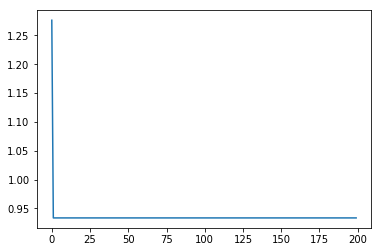

In [12]:
PSO(objective_function,bounds,particle_size,iterations)

Optimal solution: [0.025, 2.0, 0.025, 2.0, 1.2, 2.2222222222222223, 0.1485742279663982, 2.0]
Objective function value: 0.93340172635625
Evolutionary process of the objective function value:


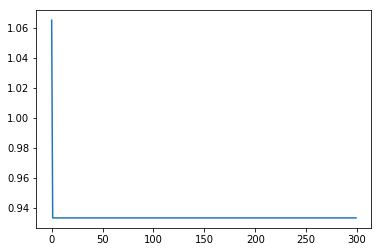

In [13]:
PSO(objective_function,bounds,500,300)